In [26]:
import numpy as np
import matplotlib.pyplot as plt

* Exercício 1.1 O método “divisão e média”, um método antigo para estimação de raiz
quadrada de um número positivo a, pode ser formulado como


xi+1 = ( xi + a/xi ) / 2
Calcule o erro relativo da aproximação para as 10 primeiras iterações.


In [8]:
a = 2
value = np.sqrt(a)
valor_aprox = 1

for i in range(10):
    valor_aprox = (valor_aprox + (a / valor_aprox)) / 2

print( (abs(value - valor_aprox) / value )* 100)
    

1.5700924586837748e-14


* Exercício 1.2 Para computadores, o épsilon da máquina, ε, pode ser definido como o menor
número que, adicionado a um, retorna um número maior que um, como definimos anteriormente.
Usando o algoritmo abaixo, implemente um programa que calcula o épsilon da sua máquina.
Compare com os resultados obtidos via numpy.

    - Passo 1: Defina e = 1
    - Passo 2: Se 1 + e for menor ou igual a 1, vá para o Passo 5;
    - caso contrário, vá ao Passo 3
    - Passo 3: e = e/2
    - Passo 4: Retorne ao Passo 2
    - Passo 5: e = 2 x e

In [16]:
e = np.float64(1)

while True:
    if  (e + 1) <= 1:
        e *= 2
        break
    e = e/2

print("e : ", e)
print("Np: ", np.finfo(dtype=np.float64).eps)

e :  2.220446049250313e-16
Np:  2.220446049250313e-16


* Exercício 1.3 Considere o seguinte processo iterativo:

In [17]:
x = 1/3

for i in range(5):
    x = 4*x-1
    print(x)

0.33333333333333326
0.33333333333333304
0.33333333333333215
0.3333333333333286
0.3333333333333144


R: Ocorre uma divergencia no arrendodamento e algumas casas decimais vão sendo modificadas.

* Exercício 1.4

In [19]:
i = [0.1,0.01, 0.0001]

for u in i:
    print("Valor: ", u)
    result1 = np.exp(1/u) / (1 + np.exp(1/u))
    result2 = 1 / (np.exp(-1/u) + 1)
    print("EQ-1 :", result1)
    print("EQ-2:", result2)

Valor:  0.1
EQ-1 : 0.9999546021312976
EQ-2: 0.9999546021312976
Valor:  0.01
EQ-1 : 1.0
EQ-2: 1.0
Valor:  0.0001
EQ-1 : nan
EQ-2: 1.0


D:\Users\202021~1\AppData\Local\Temp/ipykernel_13304/396059201.py:5: RuntimeWarning: overflow encountered in exp
  result1 = np.exp(1/u) / (1 + np.exp(1/u))
D:\Users\202021~1\AppData\Local\Temp/ipykernel_13304/396059201.py:5: RuntimeWarning: invalid value encountered in double_scalars
  result1 = np.exp(1/u) / (1 + np.exp(1/u))


R: a equação 2 é melhor para numeros muito pequenos, já que ela sempre vai arrendondando para 1.

* Exercício 1.5

In [24]:
i = [np.float64(10**-12), 10**-15, 10**-17]

for u in i:
    print( ((1+u) - 1 ) / u )


1.000088900582341
1.1102230246251565
0.0


Na vida real somar e depois subtrair não altera o resultado, mas o computador entende de forma diferente, para todos os resultado serem 1, é necessario que a subtração venha antes da soma.

In [40]:
import math

def taylor(x , n):
   soma = 0
   for i in range(n+1):
     soma += (math.pow(-1,i)) * ( (x**(2*i + 1)) / (2 * i + 1) )
   return soma

def FormuladeMachin(i):
   r1 = taylor(1/5, i)
   r2 = taylor(1/239, i)
   return 4 *(4 * r1 - r2)

def FormuladeHutton(i):
   r1 = taylor(1/2, i)
   r2 = taylor(1/3, i)
   return 4 *( r1 + r2)


def FormuladeClausen(i):
   r1 = taylor(1/3, i)
   r2 = taylor(1/7, i)
   return 4 *( 2 * r1 + r2)

def FormuladeDase(i):
   r1 = taylor(1/2, i)
   r2 = taylor(1/5, i)
   r3 = taylor(1/8, i)
   return 4 *(  r1 + r2 + r3)



<function matplotlib.pyplot.show(close=None, block=None)>

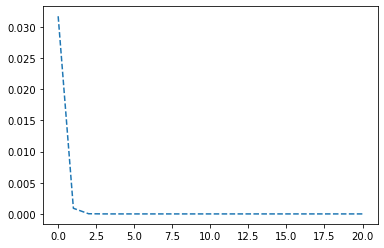

In [34]:
amostragem = np.arange(1,22,1)
erros = list()

for i in amostragem:
    base = FormuladeMachin(i)
    erros.append(abs(base-np.pi)/base * 100)
    
plt.plot(erros, linestyle = 'dashed')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

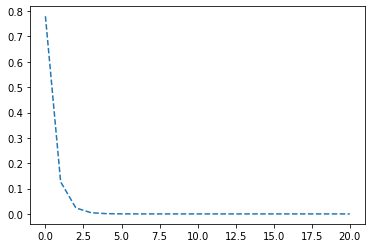

In [41]:
amostragem = np.arange(1,22,1)
errosH = list()

for i in amostragem:
    base = FormuladeHutton(i)
    errosH.append(abs(base-np.pi)/base * 100)
    
plt.plot(errosH, linestyle = 'dashed')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

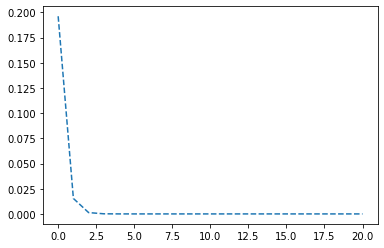

In [42]:
amostragem = np.arange(1,22,1)
erros = list()

for i in amostragem:
    base = FormuladeClausen(i)
    erros.append(abs(base-np.pi)/base * 100)
    
plt.plot(erros, linestyle = 'dashed')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

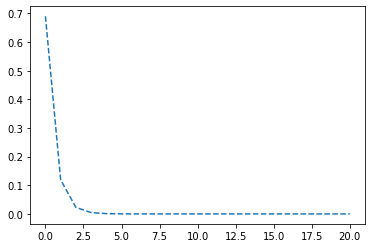

In [43]:
amostragem = np.arange(1,22,1)
erros = list()

for i in amostragem:
    base = FormuladeDase(i)
    erros.append(abs(base-np.pi)/base * 100)
    
plt.plot(erros, linestyle = 'dashed')
plt.show